# 📊 Project One: Predicting Medical Expenses with Linear Regression  

## 🔹 Overview  
This project demonstrates how to approach a real-world regression problem using **Scikit-learn**.  
We work with a dataset of medical expenses and explore how different features (numerical and categorical) influence the cost predictions.  

---

## 🔹 Key Steps in this Notebook  
1. **Problem Statement** → Define the machine learning objective and why regression is appropriate.  
2. **Data Collection & EDA** → Load the dataset, explore distributions, detect patterns, and visualize relationships.  
3. **Linear Regression (Single Variable)** → Build and interpret a simple regression model with one predictor.  
4. **Linear Regression (Multiple Variables)** → Extend to multivariate regression and evaluate performance.  
5. **Handling Categorical Features** → Apply encoding techniques (e.g., OneHotEncoder) to use non-numerical data.  
6. **Interpreting Model Coefficients** → Understand the impact of features and their importance in prediction.  
7. **Exploring Other Regression Models** → Briefly compare with additional regressors available in Scikit-learn (e.g., Decision Tree, Random Forest).  
8. **Applying to New Datasets** → Generalize the workflow by testing linear regression on another dataset.  

---

## 🔹 Skills Demonstrated  
- Exploratory Data Analysis (EDA)  
- Feature Engineering (numerical + categorical)  
- Linear Regression (univariate & multivariate)  
- Model Evaluation & Interpretation  
- Comparing Multiple Regression Models in Scikit-learn  


--------------------------------------------
--------------------------------------------


## 🔹 Problem Statement  

Healthcare costs are influenced by multiple factors such as age, gender, BMI, smoking habits, and region of residence.  
Accurately predicting medical expenses can help insurance companies design fair policies and assist individuals in planning their healthcare budgets.  

In this project, our goal is to **build a regression model** that can estimate a person’s annual medical charges based on their demographic and lifestyle attributes.  
We will start with simple linear regression, extend to multiple variables, and then compare performance against other regression models available in Scikit-learn.  


In [2]:
# Loading Project Dataset

import pandas as pd

data = pd.read_csv('../datasets/medical_expensives.csv')

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


*✅ The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*✅ Based on the information, we observe that the dataset contains a mix of numerical and categorical features. A key observation is that there are no missing values, which is a significant advantage when preparing data for machine learning models.*

In [4]:
# Some statistics for the numerical columns:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


------


##  Data Collection & EDA:

In this section, we will load the dataset and perform exploratory data analysis (EDA) to understand the distributions of features, detect patterns, and visualize relationships between variables.



### importing Libraries

In [5]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### 1. Feature One: Age  

The **Age** feature is a numerical variable representing the individual’s age.  
- **Range:** 18 to 64 years  
- **Type:** Continuous numerical feature  

To better understand its distribution, we will use a **histogram** (with one bin per year).  
For interactive visualization, **Plotly** is a suitable choice.  


In [7]:
fig = px.histogram(data, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

*✅ the histogram shows that the distribution of ages is relatively uniform across the range, with a slight peak around the late 20s .*

### 2. Feature TWO: BMI
The **BMI (Body Mass Index)** feature is a numerical variable representing the individual’s body mass index.
- **Range:** Approximately 15 to 53
- **Type:** Continuous numerical feature

to better visualize this feature we will use **histogram** 

In [8]:
fig = px.histogram(data, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

*✅As the figure shows the distribution of the BMI follows the normal gussian distribution. with few outliers toward the right.*

### 3. Feature Three: Charges

This feature represents the annual medical charges incurred by the individual.
- **Range:** Approximately 1121 to 63770
- **Type:** Continuous numerical feature

To better visualize this feature we will use **histogram**.

In [10]:
figure = px.histogram(data,
                      x="charges",
                      color="smoker",
                      marginal="box",
                      color_discrete_sequence=['green','lightblue'],
                      title="Annual Medical Charges")

figure.update_layout(bargap=0.1)
figure.show()

*✅This histogram shows that most non-smokers have relatively low annual medical charges, typically below $10,000. In contrast, smokers tend to have significantly higher charges, with many exceeding $30,000 and several extreme outliers. The distribution also suggests that even non-smokers can incur moderate medical expenses (around $7,500–$15,000), likely due to accidents or other health conditions, but overall their costs remain substantially lower than those of smokers.*

### 4. Feature Four: Smoker

This feature represents whether the individual is a smoker or not . and we will use **count plot** to visualize this feature.

In [11]:
figure = px.histogram(data, 
                      x="smoker",
                      color="sex",
                      marginal="box",
                      title="Smoker Distrubtion "
                      )

figure.update_layout(bargap=0.1)
figure.show()

*✅the histogram shows that the majority of individuals in the dataset are non-smokers, with a nearly balanced distribution between males and females. In contrast, within the smoker group, males form the dominant class , a trend that aligns with commonly observed global smoking patterns.*

### 5. Correlation between Age and Charges

This will represents the relationship between this 2 features and see how the charges effects by the age

In [16]:
figure = px.scatter(data,
                    x="age",
                    y='charges',
                    color="smoker",
                    opacity=0.8, 
                    hover_data=['sex'],
                    title="Correlation Between Age & Charges"
                    )

figure.update_layout(bargap=0.1)
figure.show()

*✅The scatter plot indicates a positive correlation between age and annual medical charges. As individuals get older, charges generally increase across both groups. For non-smokers, costs typically rise with age but tend to plateau around $16,000. In contrast, smokers consistently exhibit much higher charges, often exceeding $30,000, with several extreme outliers. These variations suggest that while age is an important factor, smoking status strongly amplifies medical expenses.*

### BMI and Charges

This section show the correlation of the BMI with target feature

In [18]:
fig = px.scatter(data, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()



* *The scatter plot reveals distinct patterns in how BMI influences medical charges based on smoking status. For non-smokers (red points), there's only a slight positive correlation between BMI and charges, with most values remaining below $20,000 regardless of BMI. In contrast, smokers (blue points) show consistently higher charges across all BMI values, typically exceeding $20,000, with many cases above $40,000.* 

* *This visualization clearly demonstrates that while higher BMI may slightly increase medical costs, smoking status is a far more significant predictor of elevated healthcare expenses. The plot also shows that individuals with higher BMI who smoke face the highest medical costs overall, suggesting these factors may have a compounding effect when combined.*

### Correlation Matrix
To visualize the correlation between numerical features, we can use a heatmap. This will help us identify which features are strongly correlated with the target variable (charges) and with each other.


In [44]:
# One hot coding categorical features smoker , female and male

smoker_values = {'yes': 1, 'no': 0}
data_encoded = data.smoker.map(smoker_values)
data_encoded.corr(data["charges"])

0.7872514304984771

In [46]:
sex_values = {'male': 1 ,'female':0}
data_encoded = data.sex.map(sex_values)

data_encoded.corr(data["charges"])

0.05729206220202541

Text(0.5, 1.0, 'Correlation')

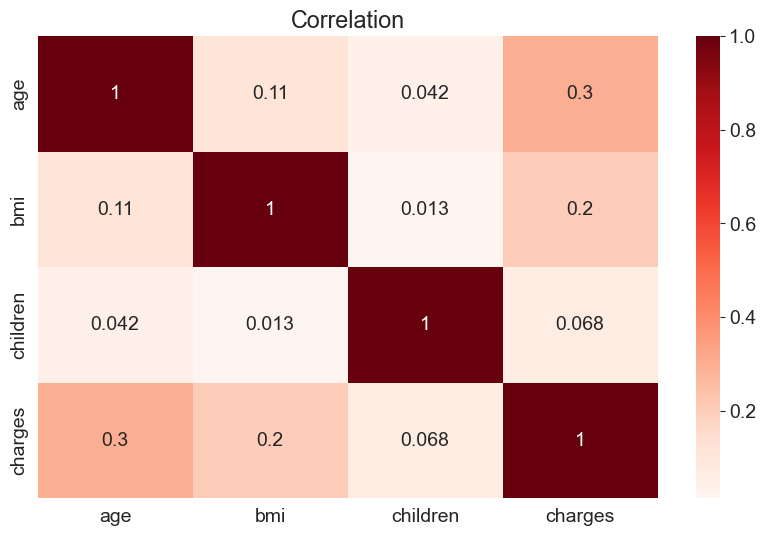

In [ ]:
corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap='Reds', annot=True)
plt.title('Correlation')


Based on this correlations , we can that the age and smoker feature are the most important predictors for our dataset since they are highly correlated.
* **Smoker** : 0.78
* **Age** : 0.3

-----------

## Univariate Linear Regression (Single Variable) 



We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.